# Lab 4 Session on Deutsch--Josza
by Muhammad Faryad

In [2]:
from qiskit import QuantumCircuit, execute, Aer, BasicAer
from qiskit.visualization import plot_histogram

import numpy as np


In [3]:
n=3
f0allx = QuantumCircuit(n+1) #constant oracle for f(x)=0 for all x


display(f0allx.draw())

f1allx = QuantumCircuit(n+1) #constant oracle for f(x)=1 for all x
f1allx.x(n)

display(f1allx.draw())

q_0: 
     
q_1: 
     
q_2: 
     
q_3:

q_0: ─────
          
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     └───┘

In [7]:

f01half = QuantumCircuit(n+1)
xgates = "001"
cxgates= "101"


# Put ancilia qubit in state |->
f01half.x(n)
f01half.h(n)

f01half.barrier()
# Place X-gates before implementing CX gates in the next loop
for i in range(n):
    if xgates[i] == '1':
        f01half.x(i)




# Place CX-gates to give phase at desired combinations
for m in range(n):
    if cxgates[m] == '1':
        f01half.cx(m,n)


# Place X-gates again to revert to original inputs on 0 to n-1 qubits
for k in range(n):
    if xgates[k] == '1':
        f01half.x(k)
f01half.barrier()
# Show oracle
f01half.draw()

░                      ░ 
q_0: ───────────░────────■─────────────░─
                ░        │             ░ 
q_1: ───────────░────────┼─────────────░─
                ░ ┌───┐  │       ┌───┐ ░ 
q_2: ───────────░─┤ X ├──┼────■──┤ X ├─░─
     ┌───┐┌───┐ ░ └───┘┌─┴─┐┌─┴─┐└───┘ ░ 
q_3: ┤ X ├┤ H ├─░──────┤ X ├┤ X ├──────░─
     └───┘└───┘ ░      └───┘└───┘      ░

In [8]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)



dj_circuit.barrier()
# Add oracle
dj_circuit =dj_circuit + f0allx
dj_circuit.barrier()
# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw()

/tmp/ipykernel_8612/2772873242.py:11: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  dj_circuit =dj_circuit + f0allx


┌───┐ ░  ░ ┌───┐ ░ ┌─┐      
q_0: ┤ H ├─░──░─┤ H ├─░─┤M├──────
     ├───┤ ░  ░ ├───┤ ░ └╥┘┌─┐   
q_1: ┤ H ├─░──░─┤ H ├─░──╫─┤M├───
     ├───┤ ░  ░ ├───┤ ░  ║ └╥┘┌─┐
q_2: ┤ H ├─░──░─┤ H ├─░──╫──╫─┤M├
     └───┘ ░  ░ └───┘ ░  ║  ║ └╥┘
q_3: ──────░──░───────░──╫──╫──╫─
           ░  ░       ░  ║  ║  ║ 
c: 3/════════════════════╩══╩══╩═
                         0  1  2

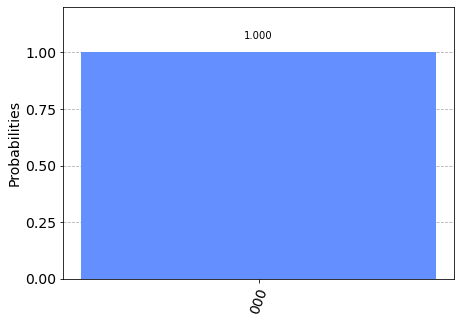

In [9]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(dj_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [18]:
from qiskit import IBMQ


IBMQ.save_account('b7c3d5261ffcdc9163d35371670119c46adb48436e35147c205928aa37c913fcbee976e715f8547f637f98adaff39dee787ff1b5038bac14d34fd69cd8937e28', overwrite=True)

In [20]:
provider=IBMQ.load_account()
backend=provider.get_backend('ibmq_athens')

ibmqfactory.load_account:WARNING:2021-06-21 18:09:27,175: Credentials are already in use. The existing account in the session will be replaced.


In [13]:
job = execute(dj_circuit, backend=backend, shots=1024)
counts=job.result().get_counts()

In [14]:
from qiskit.tools import job_monitor
job_monitor(job)


Job Status: job has successfully run


In [15]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

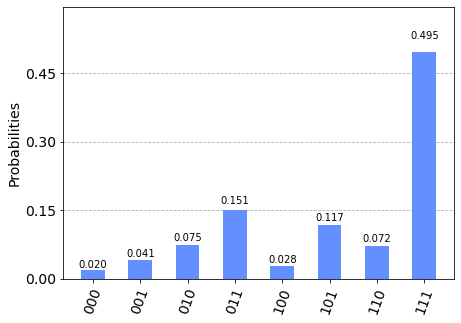

In [16]:
plot_histogram(counts)